## Integrantes del equipo

- Myroslava Sánchez Andrade A01730712
- José Antonio Bobadilla García A01734433
- Karen Rugerio Armenta A01733228
- Alejandro Castro Reus A01731065



In [2]:
glove_file = datapath("/home/reus/Desktop/IA/Modulo-3-IAA/glove.6B.100d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-2-f9c36e263be0>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
def print_sim_distance(w1, w2):
	w1_vector, w2_vector = model.get_vector(w1), model.get_vector(w2)
	w1_norm = w1_vector / np.linalg.norm(w1_vector)
	w2_norm = w2_vector / np.linalg.norm(w2_vector)
	dist = np.dot(w1_norm, w2_norm)
	print(f"{w1} is {dist:5f} similar to {w2}. {w1} is {(1 - dist):.5f} from {w2}")
	

In [5]:
def print_analogy(w1, w2, y1, debug=False):
	analogy = model.most_similar(model[y1] - model[w1] + model[w2])
	if debug:
		for word in analogy:
			print(f"{w1} is to {w2} as {y1} is to {word}")
	else:	
		print(f"{w1} is to {w2} as {y1} is to {analogy[0][0]}")

In [6]:
def display_wordmap(model, words=None, sample=100):
	if words is None:
		words = random.sample(model.index_to_key, sample)
	vectors = []	
	for word in words:
		vectors.append(model[word])
	pca = PCA(n_components=2)
	pca.fit(vectors)
	vectors = pca.transform(vectors)
	x, y = [elem[0] for elem in vectors], [elem[1] for elem in vectors]
	fig, ax = plt.subplots()
	ax.scatter(x, y)
	for i, txt in enumerate(words):
		ax.annotate(txt, (x[i], y[i]))
	

In [7]:
print_sim_distance("in", "out")

in is 0.724095 similar to out. in is 0.27590 from out


In [12]:
print_analogy("king", "man", "queen", True)

king is to man as queen is to ('woman', 0.8039792776107788)
king is to man as queen is to ('man', 0.7791377305984497)
king is to man as queen is to ('girl', 0.7349346280097961)
king is to man as queen is to ('she', 0.6817952394485474)
king is to man as queen is to ('her', 0.6592202186584473)
king is to man as queen is to ('mother', 0.6541988253593445)
king is to man as queen is to ('boy', 0.6447302103042603)
king is to man as queen is to ('teenager', 0.6348669528961182)
king is to man as queen is to ('herself', 0.6279712319374084)
king is to man as queen is to ('blond', 0.6141574382781982)


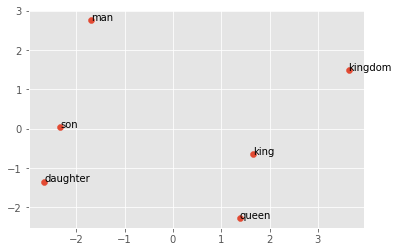

In [14]:
display_wordmap(model=model, words=["king", "son", "man", "daughter", "queen", "kingdom"], sample=12)

In [1]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.decomposition import PCA
import random

/home/reus/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
